In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
import os
# Kiểm tra thư mục hiện tại
print(os.getcwd())
# Chuyển qua thư mục mình cần thực hiện
%cd /content/drive/MyDrive/Colab\ Notebooks/DEEP\ LEARNING\ PROJECT\ ON\ YOUTUBE



/content
/content/drive/MyDrive/Colab Notebooks/DEEP LEARNING PROJECT ON YOUTUBE


In [4]:
import cv2
data_dir='./data'
image_exst=['jpeg','jpg','bmp','png']
print(os.listdir(data_dir))
image_exst


['happy', 'sad']


['jpeg', 'jpg', 'bmp', 'png']

In [5]:
for image_classes  in os.listdir(data_dir):
  print(image_classes)
  for image in os.listdir(os.path.join(data_dir,image_classes)):
    print(image)

happy
05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
227-2271622_happy-people-business-team-celebrating-png.png
60632274._UY200_.jpg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
download.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_1524148

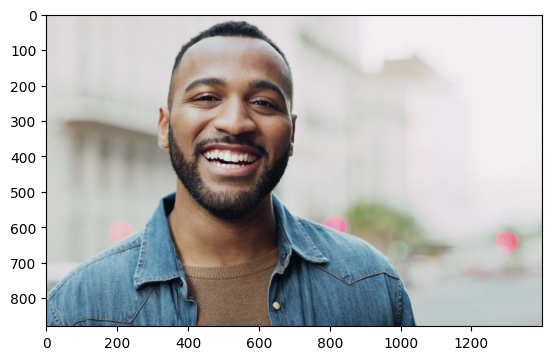

In [6]:
# Đọc ảnh với OpenCV (sẽ trả về ảnh ở định dạng BGR)
img = cv2.imread("./data/happy/05-12-21-happy-people.jpg")

# Chuyển ảnh từ BGR sang RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh với matplotlib
plt.imshow(img_rgb)
plt.show()

In [7]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    print(image_path)


./data\happy\05-12-21-happy-people.jpg
./data\happy\07-120104-happy_people_are_not_nice_people.jpg
./data\happy\1-2.jpg
./data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
./data\happy\11-Habits-of-Truly-Happy-People.jpg
./data\happy\154006829.jpg
./data\happy\170404-happy-workers-feature.jpg
./data\happy\1902539.jpg
./data\happy\1902540.jpg
./data\happy\1902587.jpg
./data\happy\1920px-face-smile.svg_.png.jpg
./data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
./data\happy\227-2271622_happy-people-business-team-celebrating-png.png
./data\happy\60632274._UY200_.jpg
./data\happy\7-Habits-of-Happy-People-image.jpeg
./data\happy\7-principles-of-successful-and-happy-people.png
./data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
./data\happy\8cxKy5g9i.jpg
./data\happy\960x0.jpg
./data\happy\ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
./data\happy\A_Sep20_14_1189155141.jpg
./data\happy\bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
./data\happy\blog

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Kích thước ảnh chuẩn hóa
IMG_SIZE = 150

# Tạo ImageDataGenerator cho huấn luyện với Data Augmentation và validation_split cho validation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Chuẩn hóa ảnh (giới hạn pixel trong khoảng [0, 1])
    rotation_range=40,  # Xoay ảnh ngẫu nhiên từ 0 đến 40 độ
    width_shift_range=0.2,  # Dịch chuyển ảnh theo chiều ngang (20%)
    height_shift_range=0.2,  # Dịch chuyển ảnh theo chiều dọc (20%)
    shear_range=0.2,  # Cắt xén ảnh
    zoom_range=0.2,  # Phóng to hoặc thu nhỏ ảnh
    horizontal_flip=True,  # Lật ảnh theo chiều ngang
    fill_mode='nearest',  # Phương thức điền cho các pixel bị mất sau khi biến đổi
    validation_split=0.2  # Tỷ lệ dữ liệu được sử dụng cho validation
)

# Tạo generator cho dữ liệu huấn luyện với subset là 'training' (80% dữ liệu)
train_data = train_datagen.flow_from_directory(
    'data',  # Thư mục chứa dữ liệu
    target_size=(IMG_SIZE, IMG_SIZE),  # Thay đổi kích thước ảnh về IMG_SIZE x IMG_SIZE
    batch_size=32,  # Số lượng ảnh mỗi lần xử lý
    class_mode='binary',  # Nhãn nhị phân (happy/sad)
    shuffle=True,  # Xáo trộn dữ liệu
    subset='training'  # Chỉ lấy dữ liệu huấn luyện (80% dữ liệu)
)

# Tạo generator cho dữ liệu validation với subset là 'validation' (20% dữ liệu)
validation_data = train_datagen.flow_from_directory(
    'data',  # Thư mục chứa dữ liệu
    target_size=(IMG_SIZE, IMG_SIZE),  # Thay đổi kích thước ảnh về IMG_SIZE x IMG_SIZE
    batch_size=32,  # Số lượng ảnh mỗi lần xử lý
    class_mode='binary',  # Nhãn nhị phân (happy/sad)
    shuffle=False,  # Không xáo trộn dữ liệu validation
    subset='validation'  # Chỉ lấy dữ liệu validation (20% dữ liệu)
)
print(train_data.class_indices)


Found 246 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
{'happy': 0, 'sad': 1}


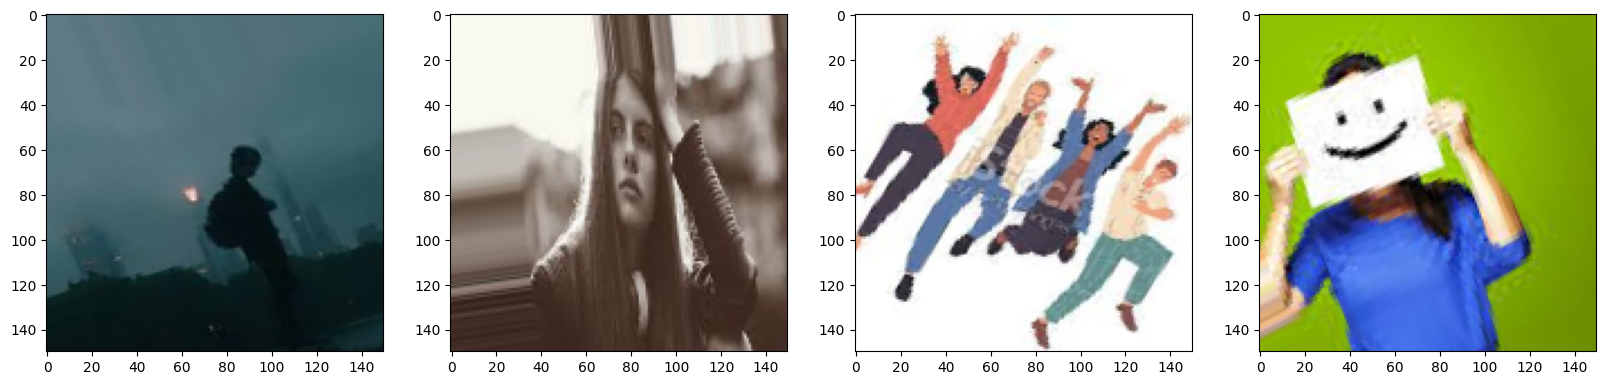

In [9]:
fix,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(train_data[0][0][:4]):
  ax[idx].imshow(img)
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Kiểm tra xem có GPU không
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Tạo mô hình CNN
model = Sequential()

# Lớp Conv2D đầu tiên
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp Conv2D thứ hai
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp Conv2D thứ ba
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Chuyển ảnh 2D thành mảng 1D
model.add(Flatten())

# Lớp fully connected
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout để tránh overfitting

# Lớp đầu ra
model.add(Dense(1, activation='sigmoid'))  # Nhãn nhị phân: "happy" hoặc "sad"

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Num GPUs Available:  0


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,994,305 (7.61 MB)

 Trainable params: 1,994,305 (7.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:

# Sử dụng GPU (nếu có)
with tf.device('/GPU:0'):  # Đảm bảo mô hình sử dụng GPU đầu tiên
    history = model.fit(
    train_data,  # Dữ liệu huấn luyện
    epochs=50,  # Số epoch
    steps_per_epoch=train_data.samples // train_data.batch_size,  # Số bước mỗi epoch
    validation_data=validation_data,  # Dữ liệu validation
    validation_steps=validation_data.samples // validation_data.batch_size, # Số bước mỗi epoch cho validation
)

c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5039 - loss: 0.7325 - val_accuracy: 0.9375 - val_loss: 0.5487
Epoch 2/50
1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.4688 - loss: 0.6955

c:\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step - accuracy: 0.4688 - loss: 0.6955 - val_accuracy: 0.8438 - val_loss: 0.6155
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 719ms/step - accuracy: 0.6035 - loss: 0.6683 - val_accuracy: 0.1562 - val_loss: 0.7954
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - accuracy: 0.5312 - loss: 0.6987 - val_accuracy: 0.3438 - val_loss: 0.7301
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 791ms/step - accuracy: 0.6485 - loss: 0.6466 - val_accuracy: 0.6562 - val_loss: 0.6139
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.7188 - loss: 0.5619 - val_accuracy: 0.3125 - val_loss: 1.0684
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 792ms/step - accuracy: 0.6570 - loss: 0.5977 - val_accuracy: 0.7812 - val_loss: 0.4846
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - accuracy: 0.7812 - loss: 0.5920 - val_accuracy: 0.5938 - val_loss: 0.6778
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 834ms/step - accuracy: 0.7395 - loss: 0.5039 - val_accuracy: 0.6562 - val_loss: 0.7248
Epo

In [17]:
# Sau khi huấn luyện xong, lưu mô hình
model.save('my_model.keras')  # Lưu mô hình vào file .h5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
download (1).jpg: Buồn (63.99%)


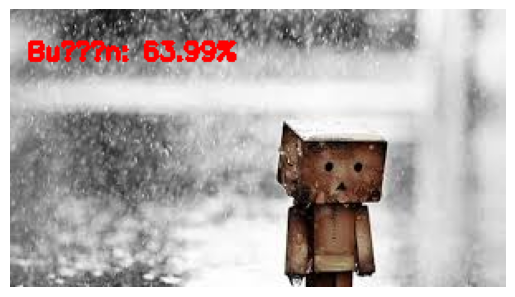

download.jpg: Vui (70.76%)


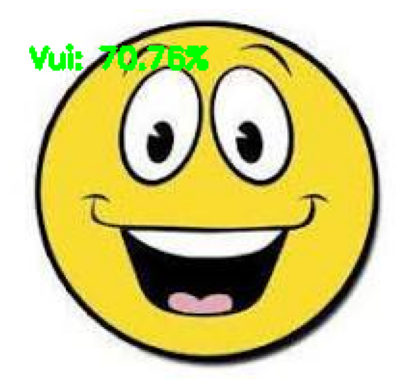

download3.jpg: Buồn (99.79%)


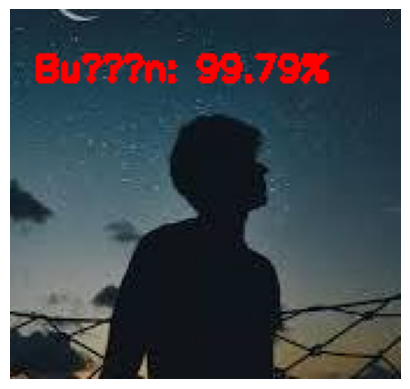

download4.jpg: Buồn (85.14%)


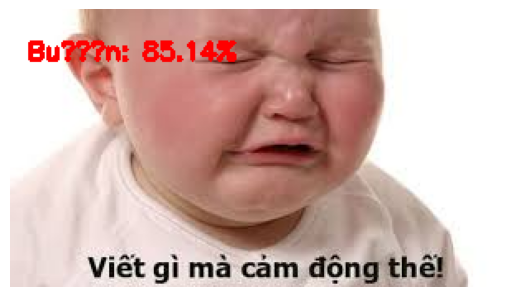

In [36]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model
# Thư mục chứa hình ảnh cần dự đoán
image_folder = './test'
# Sau khi huấn luyện, bạn có thể tải lại mô hình đã lưu
model = load_model('my_model.keras')  # Tải lại mô hình từ file .h5
# Kích thước ảnh chuẩn hóa
IMG_SIZE = 150

# Hàm đọc và chuẩn hóa các hình ảnh trong thư mục
def prepare_images(image_folder):
    images = []
    filenames = []

    for img_name in os.listdir(image_folder):  # Lặp qua các tệp trong thư mục
        img_path = os.path.join(image_folder, img_name)

        # Đọc ảnh
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Thay đổi kích thước ảnh
            img = img / 255.0  # Chuẩn hóa ảnh (giới hạn từ 0 đến 1)
            images.append(img)
            filenames.append(img_name)

    # Chuyển đổi danh sách ảnh thành mảng NumPy
    return np.array(images), filenames


# Đọc và chuẩn hóa tất cả ảnh trong thư mục
images, filenames = prepare_images(image_folder)

# Chia thành các batch nhỏ (mỗi batch 10 hình ảnh)
batch_size = 10
num_batches = len(images) // batch_size + (1 if len(images) % batch_size > 0 else 0)

# Dự đoán theo từng batch
for batch in range(num_batches):
    start_idx = batch * batch_size
    end_idx = min((batch + 1) * batch_size, len(images))  # Đảm bảo không vượt quá số lượng hình ảnh

    # Lấy batch ảnh cần dự đoán
    batch_images = images[start_idx:end_idx]

    # Dự đoán trên batch
    predictions = model.predict(batch_images)

    # Hiển thị kết quả dự đoán trên các hình ảnh trong batch
    for i, filename in enumerate(filenames[start_idx:end_idx]):
        prediction = predictions[i]
        label = "Vui" if prediction[0] < 0.5 else f"Buồn"
        confidence = (1 - prediction[0]) * 100 if label == f"Vui" else prediction[0] * 100  # Tỉ lệ xác suất
        print(f"{filename}: {label} ({confidence:.2f}%)")

        # Đọc lại hình ảnh gốc để hiển thị
        img = cv2.imread(os.path.join(image_folder, filename))

        # Thêm văn bản vào ảnh
        text = f"{label}: {confidence:.2f}%"
        font = cv2.FONT_HERSHEY_SIMPLEX
        position = (10, 30)  # Vị trí của văn bản
        font_scale = 0.5
        # Đặt màu theo label (red cho "Buồn", xanh lá cho "Vui")
        color = (0, 0, 255) if label == "Buồn" else (0, 255, 0)  # Màu đỏ cho "Buồn", xanh lá cho "Vui"
        thickness = 2

        # Vẽ text lên hình ảnh
        cv2.putText(img, text, position, font, font_scale, color, thickness)

        # Convert BGR to RGB for matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Hiển thị hình ảnh trong Jupyter notebook
        plt.imshow(img_rgb)
        plt.axis('off')  # Tắt trục
        plt.show()  # Hiển thị hình ảnh

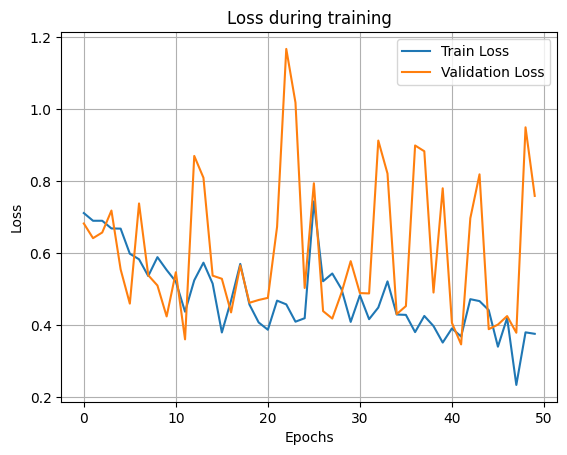

In [17]:
# Vẽ đồ thị loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


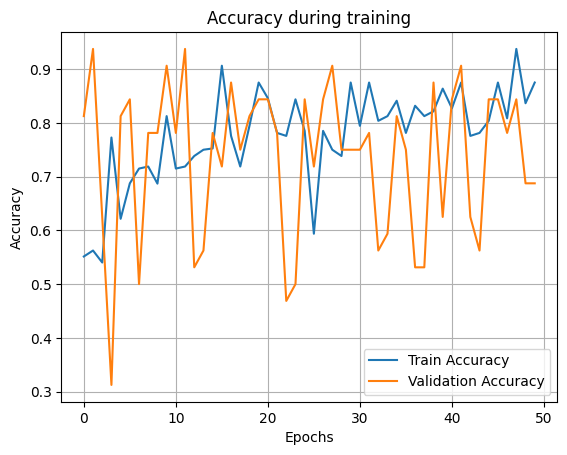

In [18]:
# Vẽ đồ thị accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()